# Práctica 1. Resolución numérica de ecuaciones no lineales

> Alumno: Miguel Ángel Fernández Gutiérrez
>
> 3º Doble Grado en Ingeniería Informática y Matemáticas, 2019/2020

###### Importar módulos de Python necesarios

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy import sign
from decimal import *

## Ejercicio 1

Demuestre que la ecuación  $x^3+4 x^2=10$  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

### Solución al ejercicio 1

Para comprobar que $x^3+4x=10$ tiene una única raíz en el intervalo $[1,2]$ definimos la función $$f:[1,2]\longrightarrow\mathbb{R}\;\;\;\;f(x)=x^3+4x-10\;\forall x \in [1,2]$$

Evidentemente, resolver la ecuación del enunciado es equivalente a ver las raíces de $f$. Usaremos el teorema de Bolzano para ver que tiene una única raíz en $[1,2]$. Para ello, evaluamos la función en los extremos.

In [2]:
x = sp.Symbol('x')
def f0(x):
    return x**3+4*x-10
funciones = [f0]

In [3]:
f0(1), f0(2)

(-5, 6)

Evidentemente vemos que $f(1)f(2)<0$, por lo que $f$ tiene al menos una raíz en $[1,2]$. Para ver que es única, podemos ver que la función $f$ es creciente en $[1,2]$, para lo que basta ver que el signo de su derivada es siempre positivo$$f'(x)=3x^2+4>0\;\forall x \in [1,2]$$

Ahora aproximaremos dicha raíz con el método de bisección.

Antes hacemos un método para encontrar la raíz exacta haciendo uso de `sympy`.

###### Encontrar la raíz exacta en un intervalo

In [4]:
def solucion_exacta(f, a=-sp.oo, b=sp.oo, cifras=None):
    """
    Encontrar la raíz exacta de f en un intervalo [a,b]
    
    Importante: es necesario que haya una única raíz en el intervalo.
    En caso contrario, se retornará una de ellas.
    
    En caso de que no haya raíces en el intervalo o sympy no pueda
    encontrar la raíz se retornará None
    
    Si no se especifica en un intervalo, se tomará (-oo,+oo)
    
    Parameters
    ----------
    f : function
        Función de la que encontrar la raíz
    a: float
        Extremo inferior
    b: float
        Extremo superior
        
    Return
    ------
    """
    
    x = sp.Symbol('x')
    try:
        sol_exact = sp.solve(f(x), x)
    except:
        sol_exact = []
    
    for sol in sol_exact:
        if sol.is_real:
            if sol >= a and sol <= b:
                print("Solución exacta en decimal:", sol.evalf())
                if cifras:
                    print("Solución exacta con", cifras, "cifras significativas:", sol.evalf(n=cifras+1))
                return sol
    
    print("sympy no ha podido encontrar la solución exacta")

Ahora implementamos el método de bisección.

###### Algoritmo de bisección

In [5]:
def biseccion(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return c

Aproximamos dicha raíz con el método de bisección con al menos 3 cifras decimales exactas, es decir, con una precisión de al menos $10^{-3}$.

In [6]:
biseccion(f0, 1, 2, prec=10**(-3))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567626953125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 13


1.5567626953125

Vemos que, en efecto, la solución exacta coincide al menos en tres cifras significativas, como queríamos.

In [7]:
solucion_exacta(f0, 1, 2, cifras=3)

Solución exacta en decimal: 1.55677326439421
Solución exacta con 3 cifras significativas: 1.557


-4/(3*(5 + sqrt(2217)/9)**(1/3)) + (5 + sqrt(2217)/9)**(1/3)

Hemos visto que para conseguir 3 cifras exactas hemos necesitado 13 iteraciones. Intentaremos hacer una predicción del número de iteraciones necesarias para conseguir 5 cifras decimales exactas. Sabemos que la cota del error de bisección es de $$|e_n|=|x_n-s| \leq \frac{1}{2^{n-1}}(b-a)$$
Despejando vemos que, para conseguir 5 cifras decimales exactas debe ser $|e_n|<10^{-5}$. Despejando obtenemos que debe ser $n\leq 17$. Es decir, que en 17 iteraciones habremos alcanzado la precisión deseada. Veamos si esto es cierto:

In [8]:
biseccion(f0, 1, 2, prec=10**(-5))

maxiter=100, tol=1e-05, prec=1e-05, cifras=5
Se ha alcanzado la máxima tolerancia
Aproximación de la solución: 1.55677032470703125
Aproximación de la solución con 5 cifras significativas: 1.55677
Número de iteraciones: 17


1.5567703247070312

In [9]:
solucion_exacta(f0, 1, 2, cifras=5)

Solución exacta en decimal: 1.55677326439421
Solución exacta con 5 cifras significativas: 1.55677


-4/(3*(5 + sqrt(2217)/9)**(1/3)) + (5 + sqrt(2217)/9)**(1/3)

###### Algoritmo de Newton-Raphson

In [10]:
def newton_raphson(f, df, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/df(x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

Ahora resolvemos con Newton-Raphson, hasta que el error entre dos aproximaciones consecutivas sea inferior a $10^{-3}$.

In [11]:
sp.diff(x**3+4*x-10, x)

3*x**2 + 4

In [12]:
def df0(x):
    return 3*x**2+4

In [13]:
newton_raphson(f0, df0, 1.5, prec=10**(-3))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567740374915424172996836205129511654376983642578125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 2


1.5567740374915424

In [14]:
solucion_exacta(f0, cifras=3)

Solución exacta en decimal: 1.55677326439421
Solución exacta con 3 cifras significativas: 1.557


-4/(3*(5 + sqrt(2217)/9)**(1/3)) + (5 + sqrt(2217)/9)**(1/3)

## Ejercicio 2

Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos, usando el algoritmo de bisección.

### Solución al ejercicio 2

Ejecutamos el [algoritmo de Bisección](#Algoritmo-de-bisección) programado anteriormente. Para encontrar la raíz cúbica de 25, basta encontrar la raíz de la función$$f(x)=x^3-25$$
Usando el teorema de Bolzano vemos que hay una raíz en el intervalo $[2,3]$. Además, vemos que la derivada es siempre positiva en dicho intervalo, por lo que la raíz es única. Ahora procederemos a aplicar bisección en $[2,3]$ para obtener dos cifras decimales exactas.

In [15]:
def f1(x):
    return x**3-25
funciones.append(f1)

In [16]:
biseccion(f1, 2, 3, cifras=2)

maxiter=100, tol=1e-05, prec=0.001, cifras=2
Se ha alcanzado la precisión deseada
Aproximación de la solución: 2.92401123046875
Aproximación de la solución con 2 cifras significativas: 2.92
Número de iteraciones: 14


2.92401123046875

In [17]:
solucion_exacta(f1, 2, 3, cifras=2)

Solución exacta en decimal: 2.92401773821287
Solución exacta con 2 cifras significativas: 2.92


5**(2/3)

## Ejercicio 3

Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$, partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.

1. $x^3-x-1 = 0$ en $[1,2]$.
2. $3x=2+x^2-e^x$.
3. $x^2+10 \cos(x)+x=0$.

### Solución al ejercicio 3

Usamos el método de Newton-Rhapson definido la solución al ejercicio anterior.

#### Apartado 3.1

Estudiaremos las raíces de $$f(x)=x^3-x-1$$partiendo de $x_0=1.3$ en el intervalo $[1,2]$.

In [18]:
def f2(x):
    return x**3-x-1
funciones.append(f2)

In [19]:
sp.diff(x**3-x-1, x)

3*x**2 - 1

In [20]:
def df2(x):
    return 3*x**2-1

In [21]:
newton_raphson(f2, df2, 0, 1, 2, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.3247187886152571589803983442834578454494476318359375
Aproximación de la solución con 3 cifras significativas: 1.325
Número de iteraciones: 20


1.3247187886152572

In [22]:
solucion_exacta(f2, 1, 2)

Solución exacta en decimal: 1.32471795724475


1/(3*(sqrt(69)/18 + 1/2)**(1/3)) + (sqrt(69)/18 + 1/2)**(1/3)

#### Apartado 3.2

Estudiaremos las raíces de$$f(x)=3x-2-x^2+e^x$$partiendo de $x_0=0$, sin especificar el intervalo.

In [23]:
def f3(x):
    return 3*x-2-x**2+np.exp(x)
funciones.append(f3)

In [24]:
sp.diff(3*x-2-x**2+sp.exp(x),x)

-2*x + exp(x) + 3

In [25]:
def df3(x):
    return -2*x+np.exp(x)+3

In [26]:
newton_raphson(f3, df3, 0, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0.257524945045739972471210421645082533359527587890625
Aproximación de la solución con 3 cifras significativas: 0.258
Número de iteraciones: 2


0.25752494504574

In [27]:
solucion_exacta(f3)

sympy no ha podido encontrar la solución exacta


#### Apartado 3.3

Estudiaremos las raíces de$$f(x)=x^2+10 \cos(x)+x$$partiendo de $x_0=-1$, sin especificar el intervalo.

In [28]:
def f4(x):
    return x**2+10*np.cos(x)+x
funciones.append(f4)

In [29]:
sp.diff(x**2+10*sp.cos(x)+x, x)

2*x - 10*sin(x) + 1

In [30]:
def df4(x):
    return 2*x-10*np.sin(x)+1

In [31]:
newton_raphson(f4, df4, -1, tol=10**(-5))

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -1.6869398658093508469590915410663001239299774169921875
Aproximación de la solución con 3 cifras significativas: -1.687
Número de iteraciones: 3


-1.6869398658093508

In [32]:
solucion_exacta(f4)

sympy no ha podido encontrar la solución exacta


## Ejercicio 4

Para la función  $f(x)= 3 x^2+e^x-1$, 

1. encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos, y determine el número de iteraciones realizadas;
2. encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

### Solución al ejercicio 4

#### Apartado 4.1

In [33]:
def f5(x):
    return 3*x**2+np.exp(x)-1
funciones.append(f5)

In [34]:
biseccion(f5, 0, 1, prec=10**(-5), cifras=4)

maxiter=100, tol=1e-05, prec=1e-05, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0.00000762939453125
Aproximación de la solución con 4 cifras significativas: 0.0000
Número de iteraciones: 17


7.62939453125e-06

In [35]:
solucion_exacta(lambda x: 3*x**2+sp.exp(x)-1, 0, 1)

sympy no ha podido encontrar la solución exacta


Aunque no la encuentre es fácil ver que la solución exacta es $0$.

#### Apartado 4.2

In [36]:
sp.diff(3*x**2+sp.exp(x)-1, x)

6*x + exp(x)

In [37]:
def df5(x):
    return 6*x+np.exp(x)

In [38]:
newton_raphson(f5, df5, 0, 0, 1, tol=10**(-4))

maxiter=100, tol=0.0001, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 0
Aproximación de la solución con 3 cifras significativas: 0.000
Número de iteraciones: 1


0.0

## Ejercicio 5

Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):

1. $f(x)=x^7-x^4+2$
2. $f(x)=x^7+\cos  x-3$

### Solución al ejercicio 5

El paquete `sympy` tiene una función para encontrar la solución exacta a una ecuación de la forma $f(x)=0$. Hemos implementado [una versión](#Encontrar-la-raíz-exacta-en-un-intervalo) que encuentra las soluciones en un intervalo en el que sepamos que hay una raíz única.

#### Apartado 5.1

Es sencillo ver que $f(x)=x^7-x^4+2$ tiene única raíz en $\mathbb{R}$. Por tanto, basta hacer:

In [39]:
def f6(x):
    return x**7-x**4+2
funciones.append(f6)

In [40]:
solucion_exacta(f6)

Solución exacta en decimal: -1.00000000000000


-1

Por tanto la raíz es $-1$.

#### Apartado 5.2

Del mismo modo, vemos que $f(x)=x^7+\cos x -3$ tiene una única raíz en $\mathbb{R}$.

In [41]:
def f7(x):
    return x**7+sp.cos(x)-3
funciones.append(f7)

In [42]:
solucion_exacta(f7)

sympy no ha podido encontrar la solución exacta


En la función `solucion_exacta` que hemos implementado, hemos insertado un bloque `try ... except` para no mostrar el log de errores completo. Sin embargo, si realizamos `sp.solve` "manualmente" veremos claramente que `sympy` no tiene implementados métodos para resolver ecuaciones de este tipo, pues obtenemos el error `NotImplementedError`:

In [43]:
# sp.solve(f7(x), x)  --> ejecutar para ver NotImplementedError

Como no podemos resolverlo simbólicamente, usaremos resolvedor numérico de `sympy`, `nsolve`, y veremos la aproximación que nos da.

In [44]:
aprox = sp.nsolve(f7(x), x, 1)
aprox

1.14545980727001

Comprobemos esta aproximación haciendo un plot de la función en un entorno de ese punto, de radio $10^{-6}$:

Text(0.5, 1.0, 'Entorno de la raíz de f')

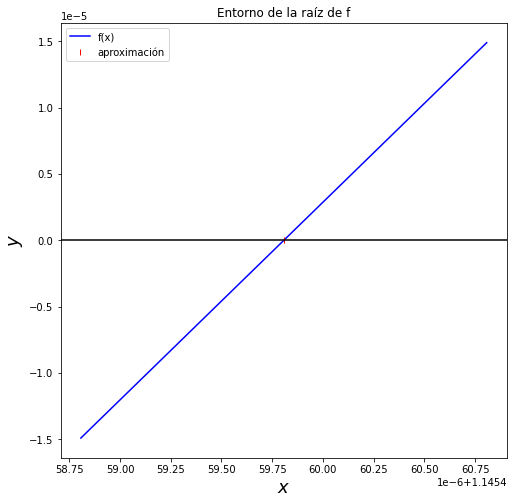

In [45]:
nxx = 100;
a = float(aprox) - 10**(-6); b = float(aprox) + 10**(-6)
xx = np.linspace(a,b,nxx)
yy = xx**7+np.cos(xx)-3
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xx,yy,'b',label='f(x)')
ax.plot(float(aprox),0,'r|', label='aproximación')
ax.axhline(y=0, color='k')
ax.legend(loc='upper left')
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Entorno de la raíz de f')

Vemos que la aproximación es bastante buena.

## Ejercicio 6

Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $f(x)=0$  en un problema de puntos fijos $g(x)=x$, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.

### Solución al ejercicio 6

Para agilizar y modularizar el procedimiento, primero programamos los diversos métodos de la práctica a continuación, insertando además los elementos en un vector de iteraciones. En total programaremos:

* `biseccion_iters`: método de bisección
* `regula_falsi_iters`: método de Regula-Falsi
* `secante_iters`: método de la secante
* `newton_raphson_iters`: método de Newton-Raphson
* `whittaker_iters`: método de Whittaker
* `steffensen_iters`: método de Steffensen

In [46]:
def biseccion_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    while niter < maxiter:
        c = (a+b)/2
        iters.append(c)
        
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
        
        niter += 1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [47]:
def regula_falsi_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    while niter < maxiter:
        c = b - ((a-b)*f(b))/(f(a)-f(b))
        iters.append(c)
        
        if abs(f(c)) < prec:
            exit = 'precisión'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            exit = 'tolerancia'
            break
        
        niter += 1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [48]:
def secante_iters(f, a, b, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    iters = []
    
    niter = 0
    x0 = a; x1 = b
    
    while niter < maxiter:
        niter = niter + 1;
        c = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        iters.append(c)
        
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        else:
            x1,x0 = c,x1
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(c))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(c), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [49]:
def newton_raphson_iters(f, df, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/df(x0)
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [50]:
def whittaker_iters(f, m, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)/m
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [51]:
def steffensen_iters(f, df, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - f(x0)**2/(f(x0+f(x0))-f(x0))
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

A continuación programaremos la aceleración de Aitken. Dada una sucesión de iteraciones, $\{x_n\}_{n\geq 0}$, construimos la sucesión acelerada $\{\hat{x}_n\}_{n\geq 0}$ como$$\hat{x}_n=x_n-\frac{(\Delta x_n)^2}{\Delta^2 x_n}=x_n-\frac{(x_{n+1}-x_n)^2}{x_{n+2}-2x_{n+1}+x_n}$$

In [52]:
def aceleracion_aitken(iters):
    iters_a = []
    for n in range(len(iters)-2):
        iters_a.append(iters[n]-(iters[n+1]-iters[n])**2/(iters[n+2]-2*iters[n+1]+iters[n]))

    return iters_a

Finalmente programamos la aceleración de Stefensen. Tomaremos la tolerancia como criterio de parada.

In [53]:
def aceleracion_steffensen(f, iters, tol=10**(-5)):
    g = lambda x: x - f(x)
    
    st = [1]
    x0, x1 = 0, 1
    
    while (abs(x1 - x0) >= tol):    
        v0 = iters[0]-(iters[1]-iters[0])**2/(iters[2]-2*iters[1]+iters[0])
        v1 = g(v0)
        v2 = g(v1)
        st.append(v0)
        iters = [v0, v1, v2]
        
        x1 = st[-1]; x0 = st[-2]
    
    return st[1:]

Vamos a realizar las comparaciones sobre alguna de las funciones que hemos definido anteriormente. Por ejemplo, `f0`, que recordamos estaba definida en el [ejercicio 1](#Ejercicio-1):$$f(x)=x^3+4x-10$$

In [54]:
f0, df0

(<function __main__.f0(x)>, <function __main__.df0(x)>)

Recordemos que $f$ sólo tenía una raíz en $\mathbb{R}$, que se encuentra en $[1,2]$. Por tanto, podemos aplicar bisección, Regula-Falsi y secante en el intervalo $[1,2]$. Además, se puede demostrar que el método de Newton-Raphson converge a la solución en este intervalo para cualquier $x_0$ inicial. Tomaremos $x_0=1.3$. También tomaremos este $x_0$ para Whittaker y Steffensen. Tomaremos $m=f'(x_0)$ para Whittaker.

In [55]:
a = 1; b = 2; x0 = 1.3; m = df0(x0)

iters = []
print("[Bisección]")
iters.append(biseccion_iters(f0, a, b))
print("[Regula-Falsi]")
iters.append(regula_falsi_iters(f0, a, b))
print("[Secante]")
iters.append(secante_iters(f0, a, b))
print("[Newton-Raphson]")
iters.append(newton_raphson_iters(f0, df0, x0))
print("[Whittaker]")
iters.append(whittaker_iters(f0, m, x0))
print("[Steffensen]")
iters.append(steffensen_iters(f0, df0, x0))

[Bisección]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567626953125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 12
[Regula-Falsi]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5566911363236892729133842294686473906040191650390625
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 4
[Secante]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Aproximación de la solución: 1.556767783245746716858093350310809910297393798828125
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 4
[Newton-Raphson]
maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.5567733222841038109862665805849246680736541748046875
Aproximación de la solución con 3 cifras significativas: 1.557
Número de iteraciones: 3
[Whitt

In [56]:
iters

[[1.5,
  1.75,
  1.625,
  1.5625,
  1.53125,
  1.546875,
  1.5546875,
  1.55859375,
  1.556640625,
  1.5576171875,
  1.55712890625,
  1.556884765625,
  1.5567626953125],
 [1.4545454545454546,
  1.5393401015228427,
  1.5538452345212188,
  1.5562827746246575,
  1.5566911363236893],
 [1.4545454545454546,
  1.5393401015228427,
  1.5575294878392076,
  1.5567677832457467],
 [1.3, 1.5869900771775083, 1.5571470603935478, 1.5567733222841038],
 [1.3,
  1.5869900771775083,
  1.548968650690248,
  1.5586355638509501,
  1.5563196332977893,
  1.556883221700839,
  1.556746579531478],
 [1.3,
  1.7571551810891253,
  1.680993828205968,
  1.614245835479416,
  1.5713647287260548,
  1.5578195890347042,
  1.5567788178259172]]

Ahora aplicaremos los procesos de aceleración de Aitken y de Steffensen a cada una de las sucesiones obtenidas por los métodos anteriores.

In [57]:
iters_aitken = []
iters_steffensen = []
for it in iters:
    iters_aitken.append(aceleracion_aitken(it))
    iters_steffensen.append(aceleracion_steffensen(f0, it))

valor_exacto = solucion_exacta(f0).evalf()

Solución exacta en decimal: 1.55677326439421


Para comparar, compararemos el error de las iteraciones del algoritmo principal con las de las aceleraciones de Aitken y Steffensen, así como el número de la última iteración (`n`), para cada uno de los algoritmos de aproximación anteriores.

In [58]:
row = ["Algoritmo", "Error algoritmo", "n", "Error Aitken", "n", "Error Steffensen", "n"]
print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))
print("-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----")

algoritmos = ["Bisección", "Regula-Falsi", "Secante", "Newton-Raphson", "Whittaker", "Steffensen"]

for i in range(len(algoritmos)):
    row = [algoritmos[i]]
    
    # error algoritmo
    n = len(iters[i])
    val = iters[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    # error Aitken
    n = len(iters_aitken[i])
    val = iters_aitken[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    # error Steffensen
    n = len(iters_steffensen[i])
    val = iters_steffensen[i][n-1]
    row.append(abs(val-valor_exacto))
    row.append(n)
    
    print("{: <14} {: >26} {: >5} {: >26} {: >5} {: >26} {: >5}".format(*row))

Algoritmo                 Error algoritmo     n               Error Aitken     n           Error Steffensen     n
-------------- -------------------------- ----- -------------------------- ----- -------------------------- -----
Bisección           0.0000105690817113757    13       0.000132639394211376    11       3.63780117140777E-11     6
Regula-Falsi        0.0000821280705221028     5        5.26174224191323E-8     3       1.33226762955019E-15     3
Secante            0.00000548114846465886     4      0.0000251341807773198     2       3.06421554796543E-14     4
Newton-Raphson        5.78898924352700E-8     4     0.00000468196736691517     2       2.22044604925031E-16     4
Whittaker           0.0000266848627332728     7        2.06707038152842E-8     5       2.22044604925031E-16     4
Steffensen         0.00000555343170582923     7      0.0000810726710478438     5       6.66133814775094E-16     7


## Ejercicio 7

Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados
con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).

### Solución al ejercicio 7

Lo programamos sencillamente a partir del de Newton-Raphson:

In [59]:
def newton_raphson_acelerado(f, df, m, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - m*f(x0)/df(x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

Lo usaremos para encontrar la raíz múltiple $\sqrt{2}$, de multiplicidad $m=3$, de la ecuación$$f(x)=(x-\sqrt{2})^3(x+4)$$

In [60]:
def f8(x):
    return (x-np.sqrt(2))**3*(x+4)

In [61]:
sp.diff((x-sp.sqrt(2))**3*(x+4),x)

3*(x + 4)*(x - sqrt(2))**2 + (x - sqrt(2))**3

In [62]:
def df8(x):
    return 3*(x+4)*(x-np.sqrt(2))**2+(x-np.sqrt(2))**3

In [63]:
valor_exacto = solucion_exacta(f8, 0, 2)
valor_exacto

Solución exacta en decimal: 1.41421356237310


1.41421356237310

Pondremos $x_0=25$, por ejemplo, para tener más iteraciones, pues converge muy rápido.

In [64]:
newton_raphson_acelerado(f8, df8, 3, 25, prec=10**(-4))

maxiter=100, tol=1e-05, prec=0.0001, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.43966471556344810522887200932018458843231201171875
Aproximación de la solución con 4 cifras significativas: 1.4397
Número de iteraciones: 3


1.439664715563448

Compararemos ahora con Aitken y Stefensen. Del mismo modo, creamos una función que guarda las iteraciones.

In [65]:
def newton_raphson_acelerado_iters(f, df, m, x0, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    iters = [x0]
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - m*f(x0)/df(x0)
        iters.append(x1)
        
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', Decimal(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(Decimal(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return iters

In [66]:
iters = newton_raphson_acelerado_iters(f8, df8, 3, 25, prec=10**(-4))

maxiter=100, tol=1e-05, prec=0.0001, cifras=4
Se ha alcanzado la precisión deseada
Aproximación de la solución: 1.43966471556344810522887200932018458843231201171875
Aproximación de la solución con 4 cifras significativas: 1.4397
Número de iteraciones: 3


In [67]:
iters

[25, 6.444600737809118, 2.1100848456345567, 1.439664715563448]

In [68]:
iters_aitken = aceleracion_aitken(iters)
iters_steffensen = aceleracion_steffensen(f8, iters, tol=10**(-3))

Esta vez podemos comparar a la vista:

In [69]:
valor_exacto

1.41421356237310

In [70]:
iters

[25, 6.444600737809118, 2.1100848456345567, 1.439664715563448]

In [71]:
iters_aitken

[0.7889272543187431, 1.3169978476684507]

In [72]:
iters_steffensen

[0.7889272543187431,
 1.4300072104287338,
 1.4247406163133771,
 1.421231754993639,
 1.4188927416107997,
 1.4173332795661917,
 1.416293522960526,
 1.4156002556537108]

## Ejercicio 8

Programar el conocido algoritmo de Horner para la evaluación de un polinomio y emplearlo de forma reiterativa para el cálculo del desarrollo de Taylor de orden $ n$ de un polinomio cualquiera. Aprovecharlo también para programar una versión especial del método de Newton-Raphson para polinomios, evaluando tanto  $ p(x_k ) $ como $ p'(x_k)$ mediante el citado algoritmo y aplicarlo para aproximar alguna de las raíces reales del siguiente polinomio
$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

### Solución al ejercicio 8

Primero veamos cuál sería "mi polinomio", se trataría de: $$p(x)=1+2x+3x^2+4x^3+5x^4+6x^5+7x^6+8x^7$$

> **Nota:** para proteger mis datos personales, supondremos que mi DNI es 12345678.

Programaremos el algoritmo de Horner a continuación. Para ello, deberemos extraer los coeficientes del polinomio. Realizaremos una primera aproximación en la que le pasaremos un array de coeficientes, de forma que un polinomio$$p(x)=a_0+a_1x+a_2x^2+...+a_nx^n$$se corresponde al array `[a_0, a_1, ..., a_n]`.

Nuestra primera aproximación del algoritmo tendrá como _input_ este array.

In [73]:
def horner_prev(coefs, x0):
    n = len(coefs)
    b = coefs[n-1]
    
    for a in coefs[-2::-1]:
        b = a + b*x0
        
    return b   

Comprobemos que funciona con ciertos valores (por ejemplo, de -5 a 5 en pasos de 0.5). Nótese que nuestro polinomio $p$ tiene como array de coeficientes `[1, 2, 3, 4, 5, 6, 7, 8]`.

In [86]:
def p(x):
    return 1+2*x+3*x**2+4*x**3+5*x**4+6*x**5+7*x**6+8*x**7 # insertar polinomio dependiendo de DNI

In [87]:
p_c = [1, 2, 3, 4, 5, 6, 7, 8]

In [88]:
all([horner_prev(p_c, x0) == p(x0) for x0 in np.arange(-5,5,0.5)])

True

Sin embargo, resulta un poco tedioso tener que extraer los coeficientes a mano de un polinomio. Por suerte, `sympy` nos permite hacerlo rápidamente:

In [89]:
def get_coefs(p):
    x = sp.Symbol('x')
    coefs = sp.Poly(p(x),x).all_coeffs()[::-1]
    return coefs

In [90]:
get_coefs(p)

[1, 2, 3, 4, 5, 6, 7, 8]

Ahora podemos implementar el algoritmo de Horner de forma que le pasemos un polinomio directamente:

In [91]:
def horner(p, x0):
    coefs = get_coefs(p)
    return horner_prev(coefs, x0)

Que usaremos en una nueva implementación de Newton-Raphson que evalúe usando Horner.

In [92]:
def newton_raphson_horner(f, df, x0, a=-sp.oo, b=sp.oo, maxiter=100, tol=10**(-5), prec=10**(-3), cifras=0):
    # si no se especifican el número de cifras decimales a mostrar, se hará
    # para que coincida con la precisión, es decir, si la precisión es
    # 10**-n, el número de cifras a mostrar será n
    # en caso de que la precisión no sea una potencia de 10, se usará
    # la potencia de 10 inmediatamente inferior
    if cifras <= 0:
        cifras = int(np.ceil(abs(np.log10(prec))))
    
    exit = ''
    
    niter = 0
    while niter < maxiter:
        niter += 1
        x1 = x0 - horner(f,x0)/horner(df,x0)
        if abs(f(x1)) < prec:
            exit = 'precisión'
            break
        if abs(x1-x0) < tol:
            exit = 'tolerancia'
            break
        x0 = x1
    
    print('maxiter={}, tol={}, prec={}, cifras={}'.format(maxiter, tol, prec, cifras))
    
    if exit == 'precisión':
        print('Se ha alcanzado la precisión deseada')
    elif exit == 'tolerancia':
        print('Se ha alcanzado la máxima tolerancia')
    elif niter >= maxiter:
        print('Se llegó al número máximo de iteraciones')
    
    print('Aproximación de la solución:', float(x1))
    print('Aproximación de la solución con', cifras, 'cifras significativas:', round(float(x1), cifras))
    print('Número de iteraciones:', niter)
    
    return x1

Lo usaremos para nuestro $p$, para ello calculamos el valor de su derivada:

In [93]:
sp.diff(p(x),x)

56*x**6 + 42*x**5 + 30*x**4 + 20*x**3 + 12*x**2 + 6*x + 2

In [94]:
def dp(x):
    return 56*x**6+42*x**5+30*x**4+20*x**3+12*x**2+6*x+2

In [95]:
newton_raphson_horner(p, dp, -1)

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -0.7145407880613922
Aproximación de la solución con 3 cifras significativas: -0.715
Número de iteraciones: 5


-141520803227731018388110610841858504920544401534711901222007682555916063939662075290514310785465343200472424197173726586007135976796467972489766551562632392537996582879541407891482495865799661726807304585786814419121618039600725414630412089042058371226528252783740238965923107870315914891104320197928038093518167313519736792393528744027393921304753575917680385545042319120869710523380884664290634031152917383203458561968423747634105757315482687394307566545741513666804092671371481467051799330843717059312149284889918328165969466029183057209710438287566027387090195458546160381385815895308920352870522492091224411776694488475743369012727269297352115550564728339275983594856326428484709915033867137349785036340979328573056597513875973760537526584664364154752684940771303520489719577651320309247333369994536944895587929626591143861723051508530912618801435972599391676112432838019970140857199263898245679370697755826135766940563723215406735102349758297318319807979911321799101682797902210942676083177970

In [96]:
newton_raphson(p, dp, -1)

maxiter=100, tol=1e-05, prec=0.001, cifras=3
Se ha alcanzado la precisión deseada
Aproximación de la solución: -0.714540788061392095897872422938235104084014892578125
Aproximación de la solución con 3 cifras significativas: -0.715
Número de iteraciones: 5


-0.7145407880613921

Nótese que, al operar con coeficientes enteros, nuestro algoritmo con Horner nos da menos cifras decimales. Hemos de tener aquí también en cuenta errores relacionados con la representación de decimales en el ordenador.